In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from IPython.display import clear_output
import time
from scipy import interpolate
plt.rcParams.update({'font.size': 14})

from utilities import error, prepare_phi_and_S, convert1D_to_2D, plot_phi,residual,smoothing, restriction

In [2]:
def GS(Nx,Ny,phi,S,aE,aW,aN,aS,a0):
    for i in range(1,Nx-1):
            for j in range(1,Ny-1):

                # Gauss-Siedel Update
                phi[i,j] = (S[i,j] - aE*phi[i+1,j] - aW*phi[i-1,j] - aN*phi[i,j+1] - aS*phi[i,j-1]) / a0
    return phi

In [4]:
# numbering scheme used is k = (j-1)*N + i
# The name of variable ends with c and f are corse and fine mesh
start = time.time()
Nx1 = 41
Ny1 = 41
Nx2 = 21
Ny2 = 21
Nx3 = 11
Ny3 = 11

L = 1  # length
H = 1  # length

phi1 = np.zeros((Nx1, Ny1))
dx1 = L / (Nx1 - 1)  # Grid size
dy1 = L / (Ny1 - 1)  # Grid size
x1_list = np.arange(0, 1 + dx1, dx1)
y1_list = np.arange(0, 1 + dy1, dy1)
x1, y1 = np.meshgrid(x1_list, y1_list, indexing='ij')

phi2 = np.zeros((Nx2, Ny2))
dx2 = L / (Nx2 - 1)  # Grid size
dy2 = L / (Ny2 - 1)  # Grid size
x2_list = np.arange(0, 1 + dx2, dx2)
y2_list = np.arange(0, 1 + dy2, dy2)
x2, y2 = np.meshgrid(x2_list, y2_list, indexing='ij')


phi3 = np.zeros((Nx3, Ny3))
dx3 = L / (Nx3 - 1)  # Grid size
dy3 = L / (Ny3 - 1)  # Grid size
x3_list = np.arange(0, 1 + dx3, dx3)
y3_list = np.arange(0, 1 + dy3, dy3)
x3, y3 = np.meshgrid(x3_list, y3_list, indexing='ij')


aE1 = 1 / dx1 ** 2
aW1 = 1 / dx1 ** 2
aN1 = 1 / dy1 ** 2
aS1 = 1 / dy1 ** 2
a01 = -(2 / dx1 ** 2 + 2 / dy1 ** 2)

aE2 = 1 / dx2 ** 2
aW2 = 1 / dx2 ** 2
aN2 = 1 / dy2 ** 2
aS2 = 1 / dy2 ** 2
a02 = -(2 / dx2 ** 2 + 2 / dy2 ** 2)

aE3 = 1 / dx3 ** 2
aW3 = 1 / dx3 ** 2
aN3 = 1 / dy3 ** 2
aS3 = 1 / dy3 ** 2
a03 = -(2 / dx3 ** 2 + 2 / dy3 ** 2)

tolf = 1e-6
tolc = 1e-1

phi1, Sf = prepare_phi_and_S(Nx1, Ny1, phi1, L, H)
R2f_old, _, _ = residual(Nx1, Ny1, phi1, Sf, aE1, aW1, aN1, aS1, a01, convert=False)

R2f = 1e10
for l in tqdm(range(10000)):
    R2c = 1e10

    # R2_1 is the residual at finest grid, Grid 1
    # Rc2 is the Residual vector transferred to Grid 2
    R2_1, R_2 = smoothing(Nx1, Ny1, phi1, Sf, aE1, aW1, aN1, aS1, a01, x1_list, y1_list, x2_list,y2_list)

    # R_
    phi_corrector_2, _, R_2 = restriction(Nx2, Ny2, phi2, R_2, aE2, aW2, aN2, aS2, a02,x3_list, y3_list, x2_list, y2_list)



    Rc2, R22 = smoothing(Nx2, Ny2, phi1, Sf, aE1, aW1, aN1, aS1, a01, x1_list, y1_list, x2_list,y2_list)
    


    if l % 20 == 0:
        clear_output(True)
        print('Residual on Fine mesh:', R2_1, 'Residual on Coarse mesh:', R2c)

    if R2f < tolf:
        print('Converged! Residual: ', R2f, 'Time elapsed: ', time.time() - start)
        break


  7%|▋         | 682/10000 [00:03<00:52, 176.05it/s]

Residual on Fine mesh: 1.0495720881636983e-06 Residual on Coarse mesh: 5.119425782919441e-07
Converged! Residual:  9.865444957450916e-07 Time elapsed:  3.8908638954162598


| GS_f | GS_c | iter | Time |
| :- | :- | :-: | :-: |
| 1 | 1 | 2812 | 60s 
| 2 | 1 | 2344 | 90s 
| 1 | 2 | 1081 | 33s 
| 1 | 3 | 1081 | 31s 
| 1 | 4 | 826 | 28s 
| 1 | 5 | 668 | 26s 
| 1 | 10 | 341 | 20s 
| 1 | 20 | 171 | 17s 


By using the Partial convergence in Fine mesh residual
| GS_f | GS_c | iter | Time |
| :- | :- | :-: | :-: |
| 0.8 | 5 | 109 | 198s 
| 0.9 | 1 | 237 | 219s 

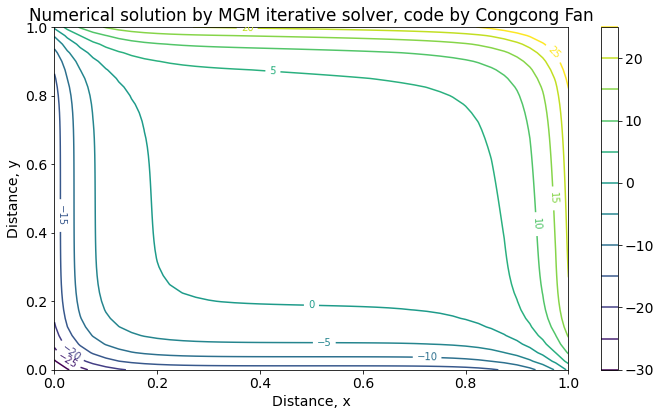

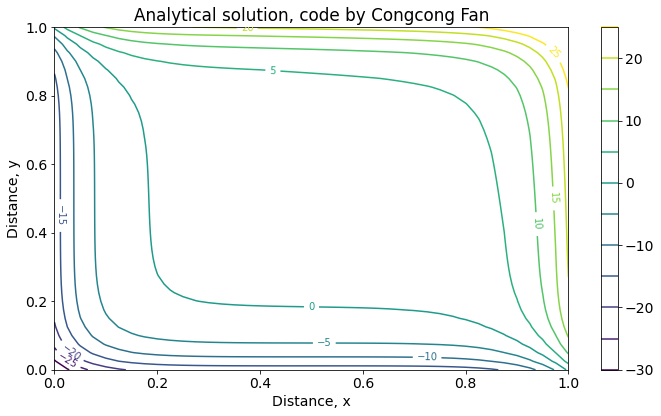

In [ ]:
# Analytical solution
x = np.linspace(0,1,Nxf)
y = np.linspace(0,1,Nyf)
phi_A = np.zeros((Nxf,Nyf))
for i in range(Nxf):
    for j in range(Nyf):
        
        phi_A[i,j] = (x[i]-0.5)**2*np.sinh(10*(x[i]-0.5))+(y[j]-0.5)**2*np.sinh(10*(y[j]-0.5))+np.exp(2*x[i]*y[j])

plot_phi(phif, phi_A, Nxf, Nyf, 'MGM', convert=False)




